<a href="https://colab.research.google.com/github/nithish-05/ML-final-project/blob/master/ML_training_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1**: Import the Datasets and Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [13]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']),)

In [14]:
df1.head(5000)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [15]:
df1.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


This are the things / features that are going to be checked for the probability that the person will **purchase loan**:



*   ID: Customer ID
*   Age: Customer's age in completed years
*   Experience: #years of professional experience
*   Income: Annual income of the customer ($000)
*   ZIP Code: Home Address ZIP code.
*   Family: Family size of the customer

*   CCAvg: Avg. spending on credit cards per month ($000)

*   Education: Education Level. 1: Undergrad; 2: Graduate; 3:
*   Advanced/Professional
*   Mortgage: Value of house mortgage if any. ($000)
*   Personal Loan: Did this customer accept the personal loan offered in the   lastcampaign?
*   Securities Account: Does the customer have a securities account with the bank?
*  CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
*  Online: Does the customer use internet banking facilities? 
*  Credit card: Does the customer use a credit card issued by the bank?

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [17]:
df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [18]:
df1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **Step 2** Removing unwanted Data

In [19]:
exp=df1['Experience']
age=df1['Age']
correlation=exp.corr(age)
correlation

0.9942148569683321

In [20]:
df1=df1.drop(['ZIP Code'],axis=1)
df1.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [21]:
df1=df1.drop(['ID'],axis=1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [22]:
df1=df1.drop(['Experience'],axis=1)
df1.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


# **Step 3**: Exploratory data Analysis

In [23]:
uniqueValues = df1.nunique()
print('Count of unique value in each column :')
print(uniqueValues)

Count of unique value in each column :
Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


In [24]:
df1['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

The number of people with zero mortage is 3462

In [25]:
df1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

The number of people with zero credit card spending per month is 3530

**Value counts of all categorical columns.**

In [26]:
df1['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [27]:
df1['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [28]:
df1['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [29]:
df1['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [30]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [31]:
df1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [32]:
df1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

**Univariate analysis**

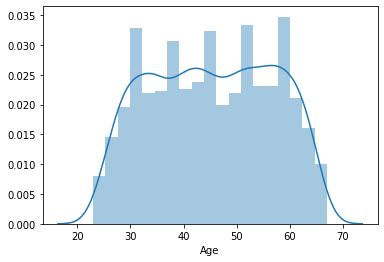

In [33]:
sns.distplot(df1.Age);

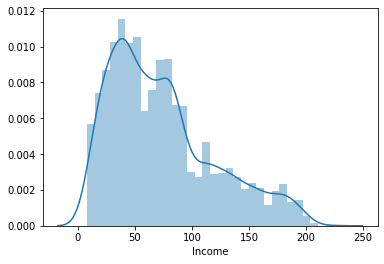

In [34]:
sns.distplot(df1.Income);

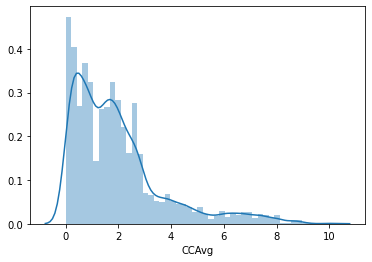

In [35]:
sns.distplot(df1.CCAvg);

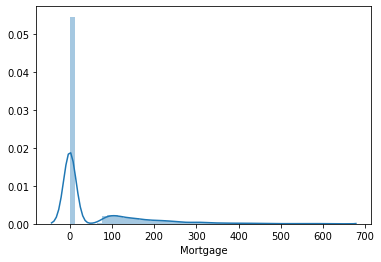

In [36]:
sns.distplot(df1.Mortgage);


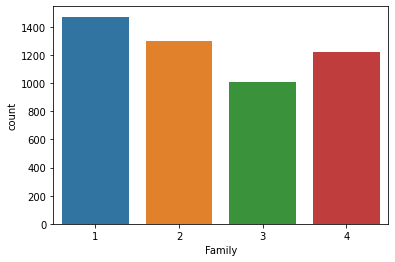

In [37]:
sns.countplot(df1.Family);

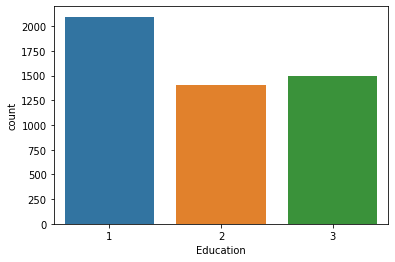

In [38]:
sns.countplot(df1.Education);

**Multivariate analysis**

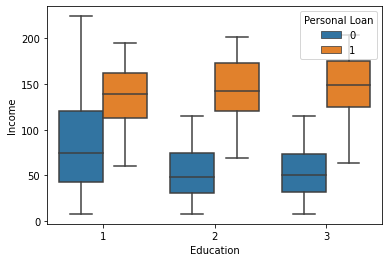

In [39]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df1);

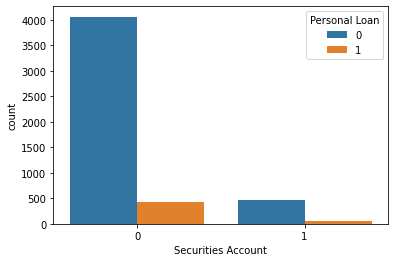

In [40]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=df1);

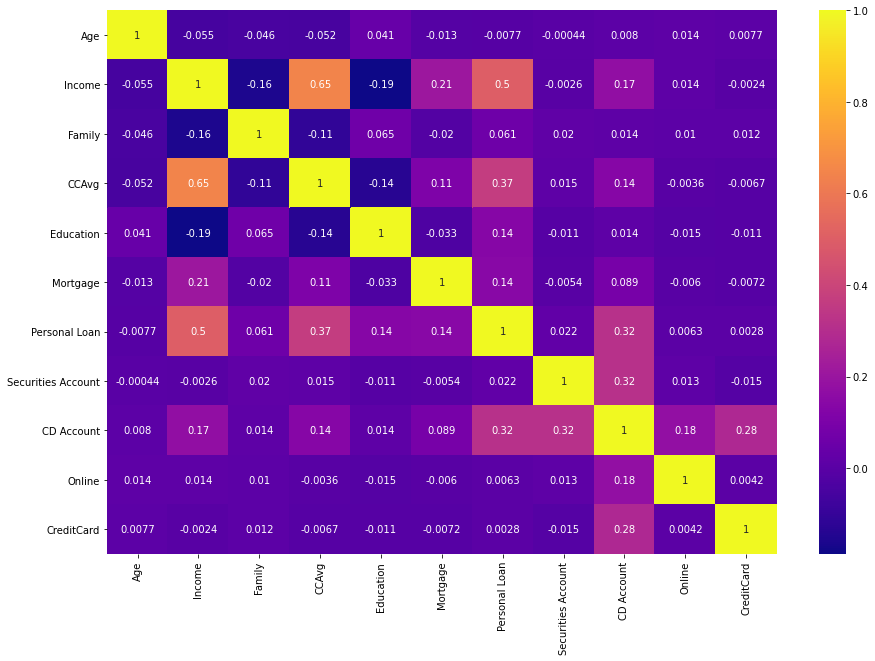

In [41]:
fig, ax= mp.subplots(figsize=(15,10))
sns.heatmap(df1.corr(), cmap='plasma',annot=True, )

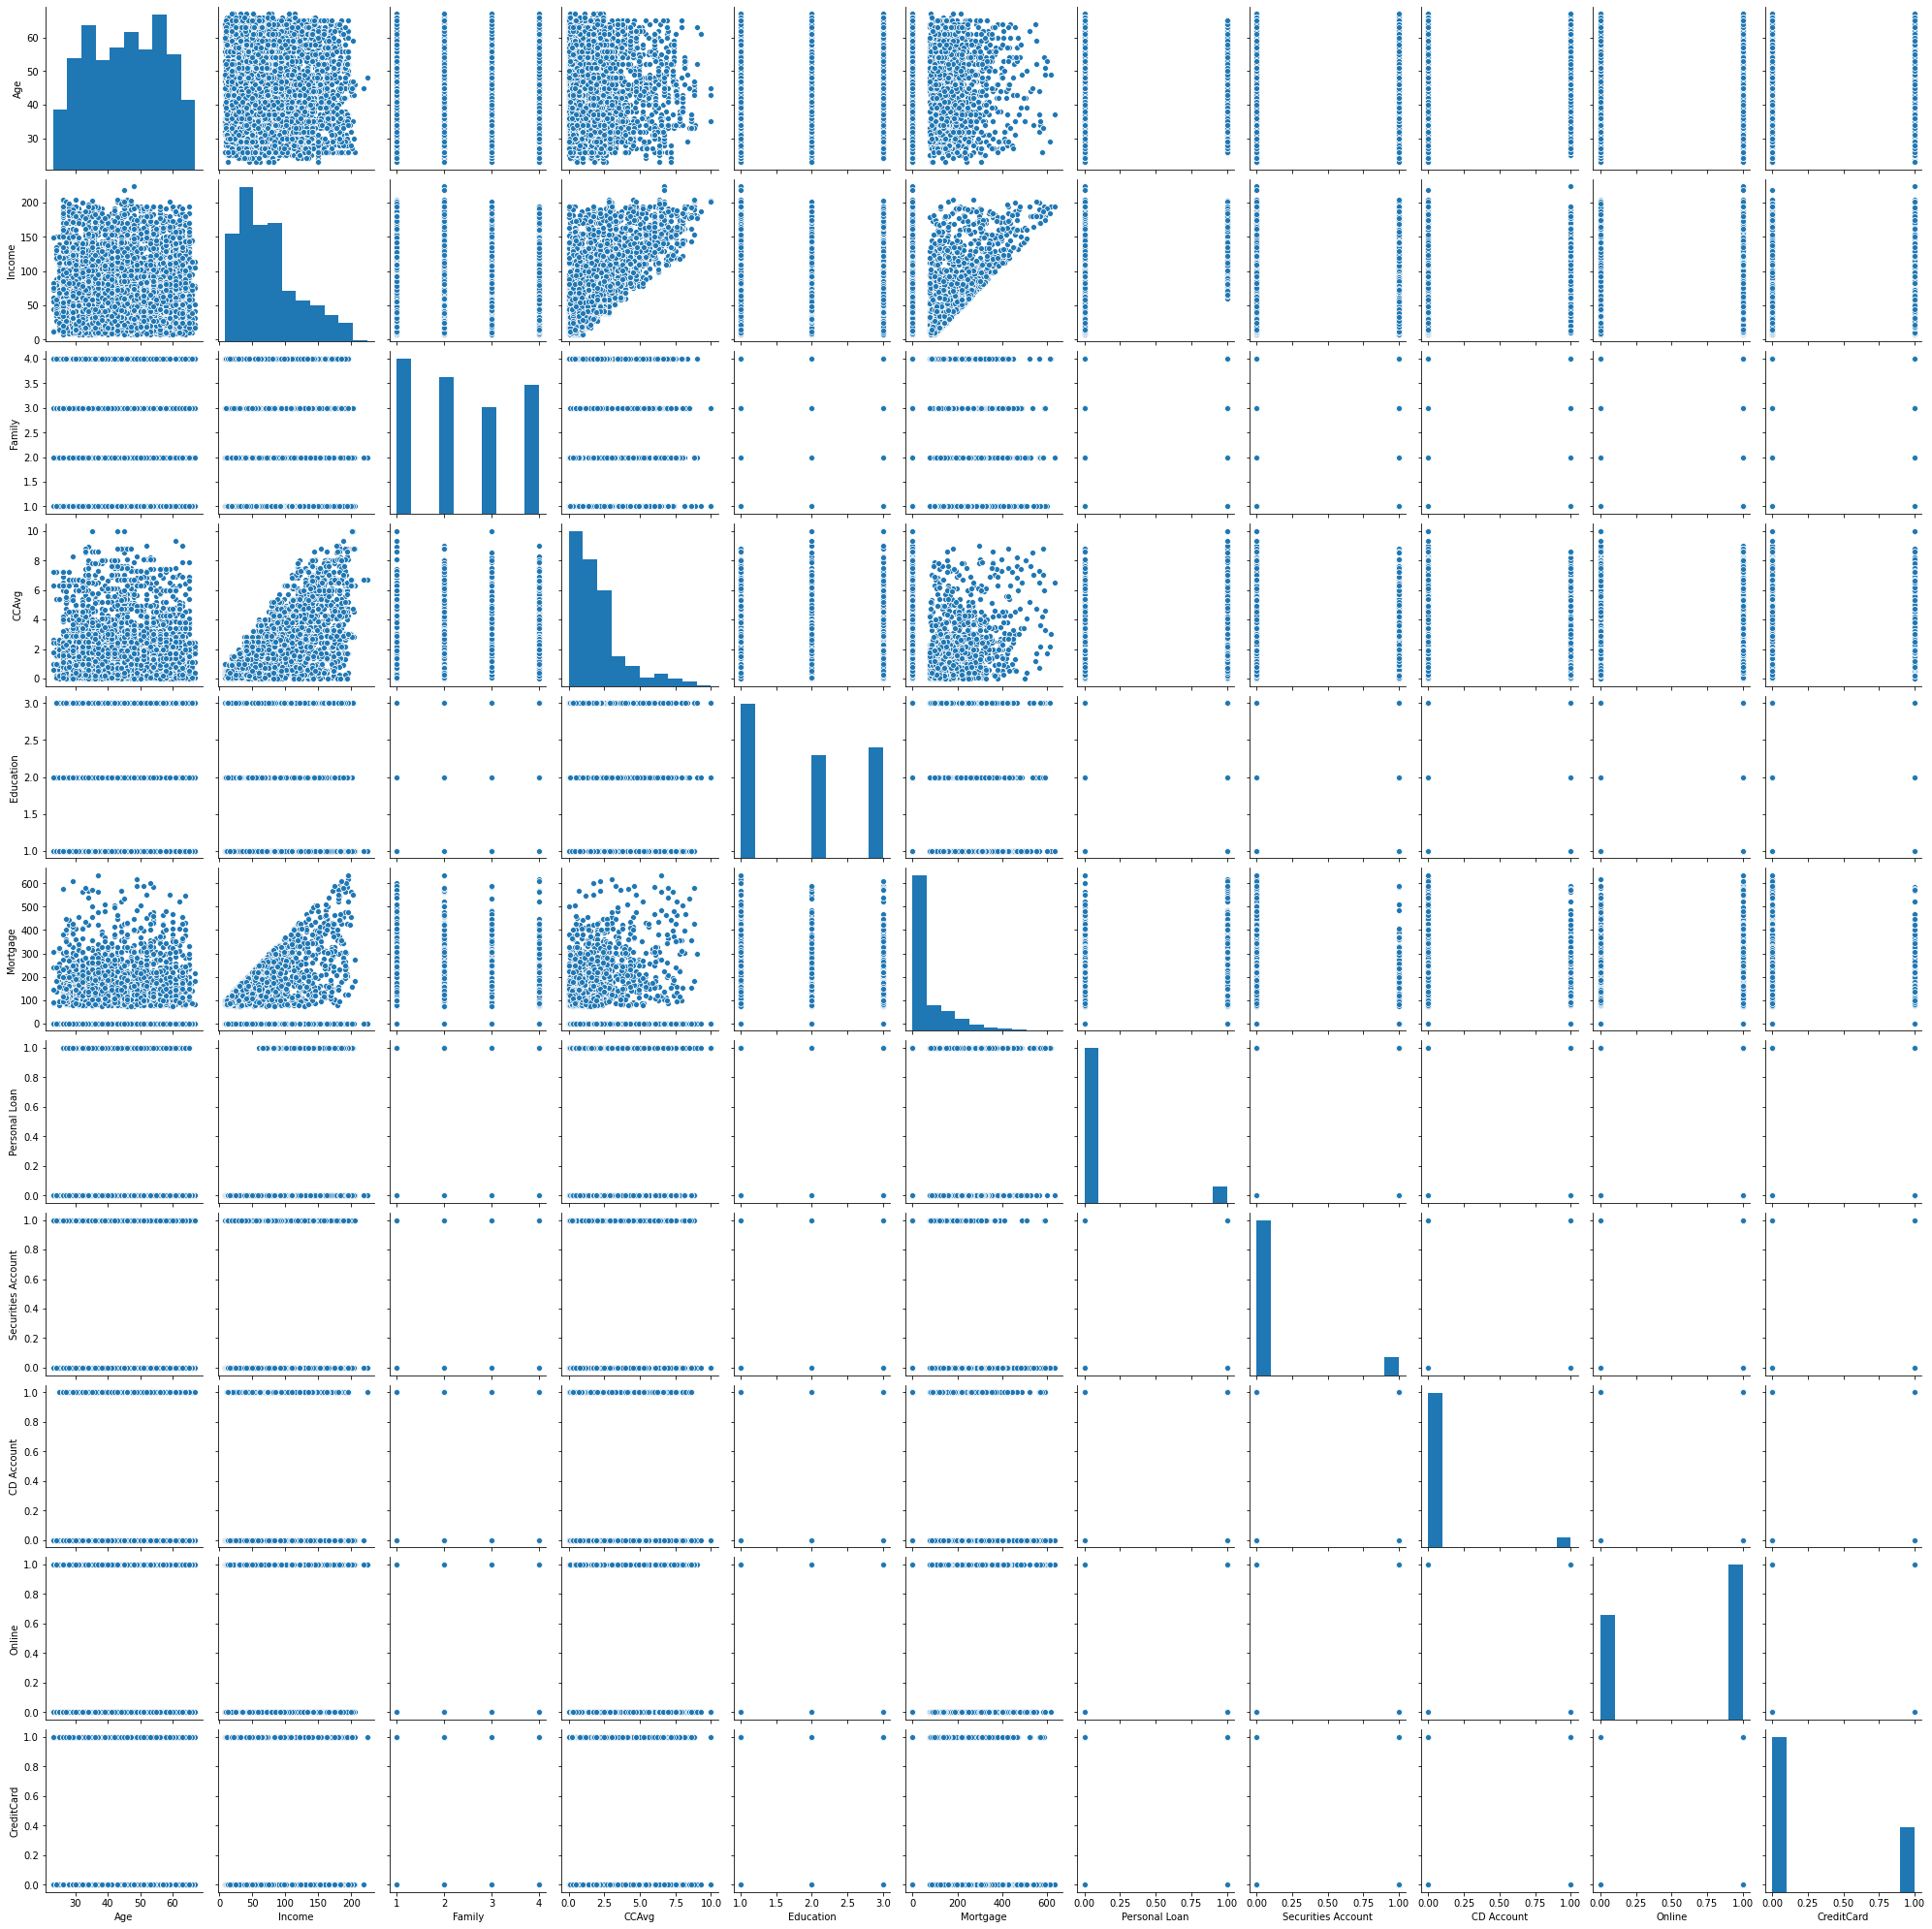

In [42]:
sns.pairplot(df1)

# **Step 4**: Transformation of feature variables

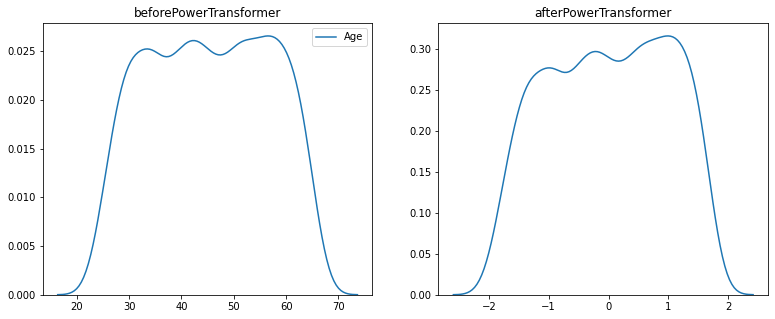

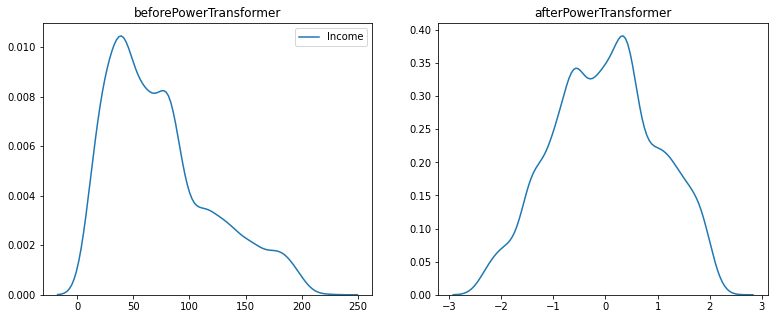

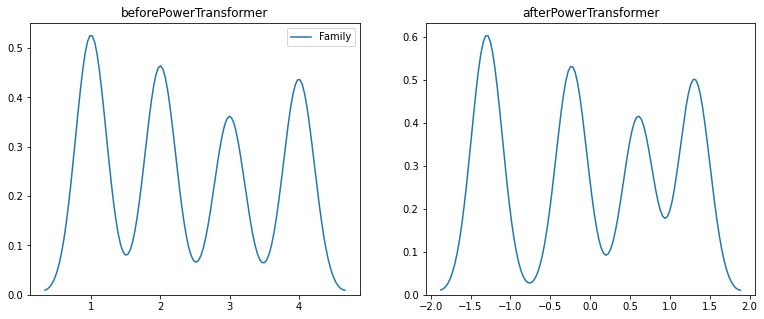

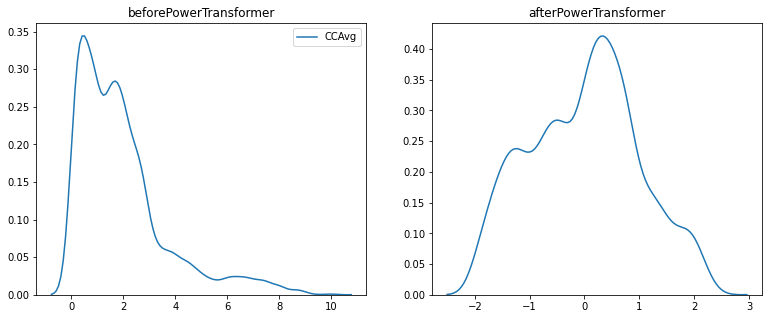

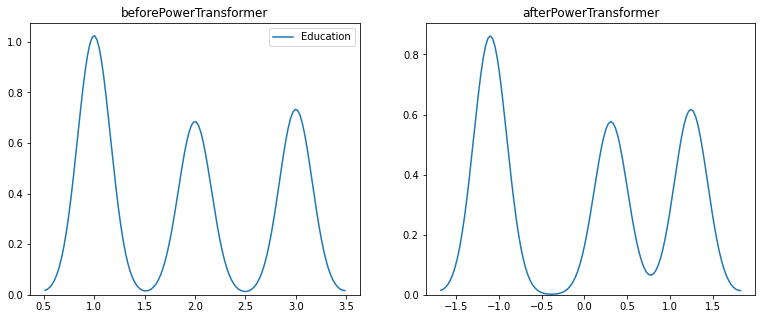

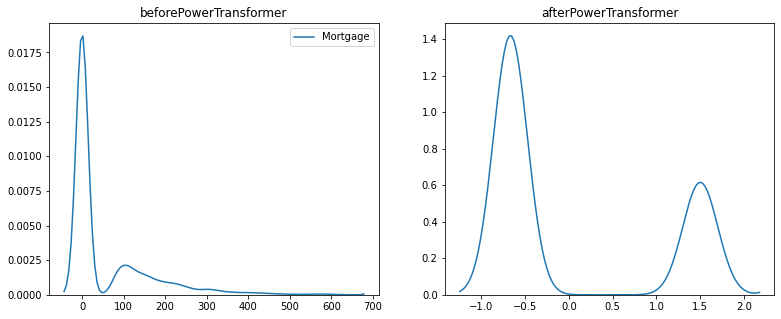

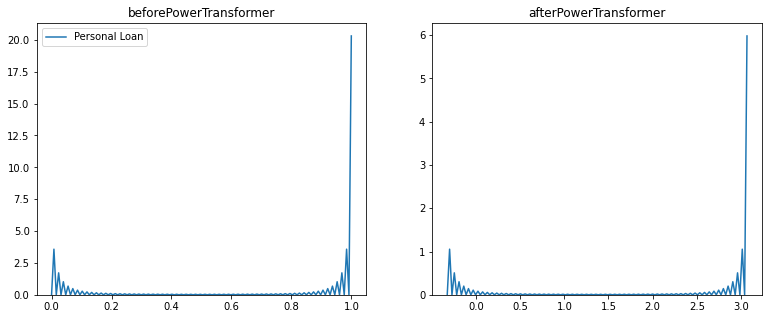

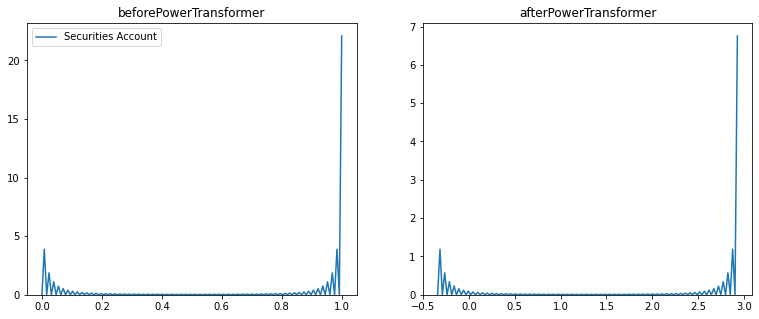

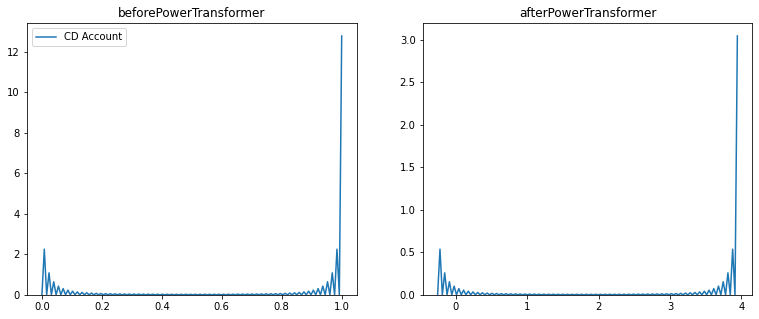

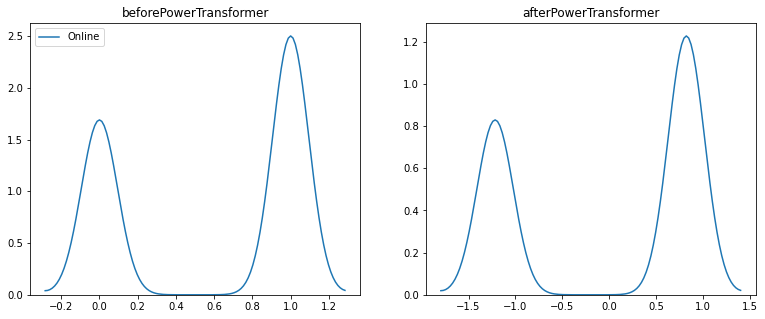

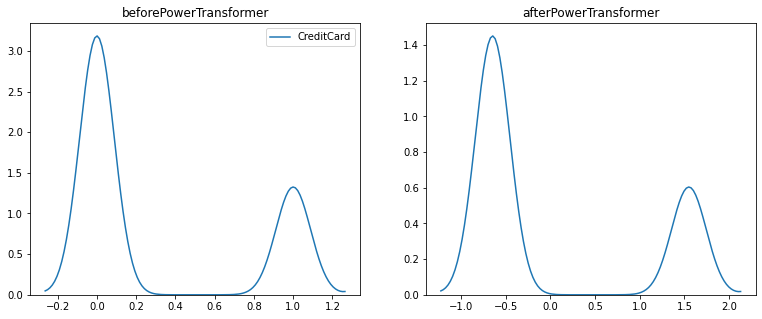

In [43]:
from sklearn.preprocessing import PowerTransformer

def graph(d,var,k):
  mp.figure(figsize=(13,5))
  mp.subplot(121)
  sns.kdeplot(d[var])
  mp.title('before'+str(k).split('(')[0])

  mp.subplot(122)
  p1=k.fit_transform(d[[var]]).flatten()
  sns.kdeplot(p1)
  mp.title('after'+str(k).split('(')[0])
for col in df1.columns :
  graph(df1,col,PowerTransformer())

In [44]:
df2=df1.drop(['Personal Loan'],axis=1)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2,df1['Personal Loan'], test_size=0.30, random_state=0, stratify = df1['Personal Loan'])
x_train.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.153143,73.515143,2.393714,1.944043,1.871714,55.966000,0.101714,0.058286,0.587143,0.299429
std,11.468384,45.934519,1.145023,1.756195,0.843481,101.737513,0.302315,0.234316,0.492418,0.458073
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.550000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.600000,3.000000,100.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


# **Step 6**:Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data=LogisticRegression(solver='liblinear')
a=df2
b=df1['Personal Loan']
data.fit(a,b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
data_coef=pd.DataFrame(data.coef_)
data_coef

,0,1,2,3,4,5,6,7,8,9
0,-0.008909,0.044608,0.493645,0.092962,1.310052,0.000342,-0.772685,3.276632,-0.643656,-0.985839


In [48]:
data.predict(a)
data.predict_proba(a)
data.score(a,b)


0.95

In [49]:
print(classification_report(b, data.predict(a)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.83      0.61      0.70       480

    accuracy                           0.95      5000
   macro avg       0.89      0.80      0.84      5000
weighted avg       0.95      0.95      0.95      5000



# **Step 7**:Evaluvation of Model performance



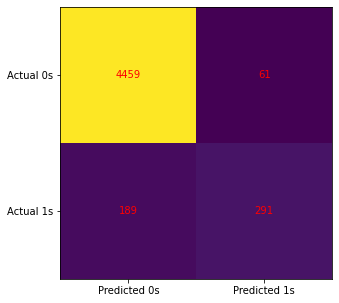

In [50]:
cf = confusion_matrix(b, data.predict(a))

fig, ap = mp.subplots(figsize=(10,5))
ap.imshow(cf)
ap.grid(False)
ap.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ap.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ap.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ap.text(j, i, cf[i, j], ha='center', va='center', color='red')
mp.show()

In [51]:
import sklearn.metrics as metrics
am=data.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, am))
print("Precision:",metrics.precision_score(y_test,am))
print("Recall:",metrics.recall_score(y_test,am))
print("F1 score:",metrics.f1_score(y_test,am))
print("Roc auc score:",metrics.roc_auc_score(y_test,am))

Accuracy: 0.9506666666666667
Precision: 0.8431372549019608
Recall: 0.5972222222222222
F1 score: 0.6991869918699186
Roc auc score: 0.7927114060963619


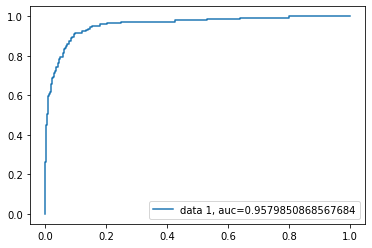

In [52]:
a3 = data.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,a3)
auc = metrics.roc_auc_score(y_test,a3)
mp.plot(fpr,tpr,label="data 1, auc="+str(auc))
mp.legend(loc=4)
mp.show()

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  
a1=classifier.predict(x_test) 

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, a1))
print("Precision:",metrics.precision_score(y_test,a1))
print("Recall:",metrics.recall_score(y_test,a1))
print("F1 score:",metrics.f1_score(y_test,a1))
print("Roc auc score:",metrics.roc_auc_score(y_test,a1))

Accuracy: 0.9846666666666667
Precision: 0.9290780141843972
Recall: 0.9097222222222222
F1 score: 0.9192982456140351
Roc auc score: 0.9511737954768928


# Naïve Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 
a2=classifier.predict(x_test) 

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, a2))
print("Precision:",metrics.precision_score(y_test,a2))
print("Recall:",metrics.recall_score(y_test,a2))
print("F1 score:",metrics.f1_score(y_test,a2))
print("Roc auc score:",metrics.roc_auc_score(y_test,a2))

Accuracy: 0.8866666666666667
Precision: 0.43434343434343436
Recall: 0.5972222222222222
F1 score: 0.5029239766081872
Roc auc score: 0.7573131760078663


# **Conclusion**

This project is a classification issue, aiming to target customer to offer bank loan offer. Three types of classification models are built, models include decision tree, Naïve Bayes, and logistic regression.

The best performance occurs when using the decision tree model. The accuracy is 0.98, with 0.95 AUC score.